In [5]:
import pandas as pd
import re
import string
import spacy
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk import word_tokenize
plt.rcParams.update({'font.size': 8})
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

我们主要采用pandas来导入数据，matplotlib进行绘图处理。对于探索性自然语言处理，我们主要使用nltk包来进行。最后几行代码规定了全局绘图的大小以及格式。没有最后一行代码指定以矢量图格式显示会导致pyplot绘制的图质量过低，难以阅读。

In [6]:
Data = pd.read_csv("/train.tsv/train.tsv",sep='\t',header=None,
                   names = ["index","sentence","phrase","sentiment"],dtype={"index":int,"sentence":int,"phrase":str,"sentiment":int})
print(Data)

         index  sentence                                             phrase  \
0            1         1  A series of escapades demonstrating the adage ...   
1            2         1  A series of escapades demonstrating the adage ...   
2            3         1                                           A series   
3            4         1                                                  A   
4            5         1                                             series   
...        ...       ...                                                ...   
156055  156056      8544                                          Hearst 's   
156056  156057      8544                          forced avuncular chortles   
156057  156058      8544                                 avuncular chortles   
156058  156059      8544                                          avuncular   
156059  156060      8544                                           chortles   

        sentiment  
0               1  
1          

为了处理的简便起见，我们在这一部分导入数据时在原始的tsv文件中把列名删除了，重新指定了列名并指定了每一列的数据类型，防止出现以外的类型转换问题。由之前的一些测试代码可以发现本数据的质量较好，没有缺失数据等，故不需要做这一步预处理。

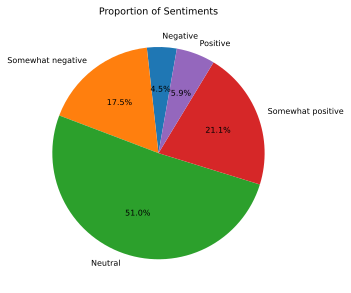

In [7]:
Data["phrase"] = Data["phrase"].apply(lambda x: x.lower())
Data["phrase"] = Data["phrase"].apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x))

Data_copy=Data.copy(deep=True)

plt.pie(Data_copy['sentiment'].value_counts().sort_index(),
        labels=['Negative','Somewhat negative','Neutral','Somewhat positive','Positive'],
        autopct='%1.1f%%',
        startangle=80
        )
plt.title('Proportion of Sentiments')
plt.show()

我们在这一步做了文本数据的预处理和一个初步统计。为了消除常见的干扰信息，我们去除了文本中的标点符号并将所有字母转为小写字母。我们对于情感类型的分布做了统计，结果显示Neutral占了一半以上，而最确定的Negative和Positive占比最少。这也非常符合本组数据将一个句子做树状拆分后，大部分短语的情感色彩为Neutral的特点。

Text(0.5, 1.0, 'Histogram of Phrase Lengths Distribution')

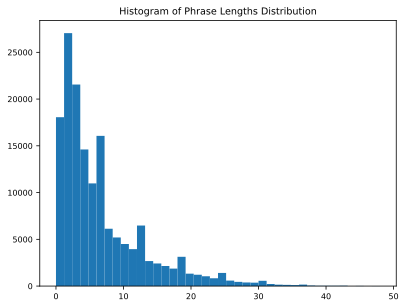

In [8]:
Data_copy['lens'] = Data_copy['phrase'].apply(lambda x: len(x.split()))
Data_copy['sentiment'] = Data_copy['sentiment'].apply(lambda x: str(x).replace('0','Negative').replace('1','Somewhat negative').replace('2','Neutral').replace('3','Somewhat positive').replace('4','Positive'))
plt.hist(Data_copy['lens'],bins=40)
plt.title('Histogram of Phrase Lengths Distribution')

然后我们分析了总体句长的分布。本组数据的句长分布呈现典型的偏态分布特征。结合数据的来源，可以推测其相对符合指数分布。

Text(0.5, 0.98, 'Histogram of Phrase Lengths Distribution By Sentiments')

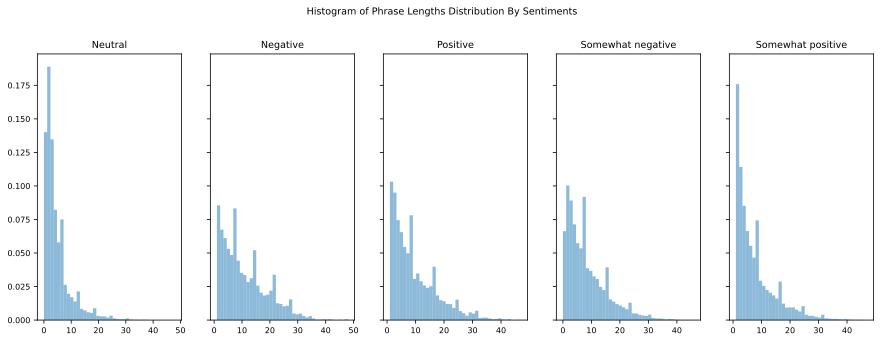

In [9]:
df_neutral = Data_copy[Data_copy['sentiment'] == 'Neutral']
df_negative = Data_copy[Data_copy['sentiment'] == 'Negative']
df_positive = Data_copy[Data_copy['sentiment'] == 'Positive']
df_somewhat_negative = Data_copy[Data_copy['sentiment'] == 'Somewhat negative']
df_somewhat_positive = Data_copy[Data_copy['sentiment'] == 'Somewhat positive']

fig,(fig1,fig2,fig3,fig4,fig5) = plt.subplots(1,5,sharey="row",figsize=(15,5))
plt.subplots_adjust(top = 0.85)
fig1.hist(df_neutral['lens'],bins=40,label='Neutral',alpha=0.5,density=True)
fig1.set_title('Neutral')
fig2.hist(df_negative['lens'],bins=40,label='Negative',alpha=0.5,density=True)
fig2.set_title('Negative')
fig3.hist(df_positive['lens'],bins=40,label='Positive',alpha=0.5,density=True)
fig3.set_title('Positive')
fig4.hist(df_somewhat_negative['lens'],bins=40,label='Somewhat negative',alpha=0.5,density=True)
fig4.set_title('Somewhat negative')
fig5.hist(df_somewhat_positive['lens'],bins=40,label='Somewhat positive',alpha=0.5,density=True)
fig5.set_title('Somewhat positive')
plt.suptitle('Histogram of Phrase Lengths Distribution By Sentiments')

然后我们对于不同情感色彩的句长进行了分析，探讨其差异性。可以看到Neutral组的句长分布明显偏短，而注释有情感的短句长度会更高一些。但是所有组别的分布仍然都是短句远多于长句。这一方面说明了大部分短句可能都没有明显的感情色彩，另一方面也说明了长句的感情色彩仍然需要由决定性的短语来确定。

In [70]:
def WordFrecAnalysis(listA,outputnumber = 0):
    Estopwords = stopwords.words('english')
    Estopwords+=['movie','film','story','movies','one','two','people','films','work']
    
    wholelist = []
    for ps in listA:
        psT = word_tokenize(ps)
        psF = [word for word in psT if word not in Estopwords]
        wholelist+=psF
    fdist = FreqDist(wholelist)
    if outputnumber != 0:
        Common_words = fdist.most_common(outputnumber)
    else:
        Common_words = fdist.most_common()
    return Common_words
    

In [71]:
df_neutral_phrase = df_neutral["phrase"].tolist()
Neutral_Freq = WordFrecAnalysis(df_neutral_phrase,20)

In [72]:
df_negative_phrase = df_negative["phrase"].tolist()
Negative_Freq =WordFrecAnalysis(df_negative_phrase,20)

In [73]:
df_positive_phrase = df_positive["phrase"].tolist()
Positive_Freq = WordFrecAnalysis(df_positive_phrase,20)

In [74]:
df_somewhat_positive_phrase = df_somewhat_positive["phrase"].tolist()
Somewhat_positive_Freq = WordFrecAnalysis(df_somewhat_positive_phrase,20)

In [75]:
df_somewhat_negative_phrase = df_somewhat_negative["phrase"].tolist()
Somewhat_engative_Freq = WordFrecAnalysis(df_somewhat_negative_phrase,20)

In [86]:
def Plot_wordFrec(Freqlist):
    Wordlist = []
    freqList = []
    for word,freq in Freqlist:
        Wordlist.append(word)
        freqList.append(freq)
    plt.barh(Wordlist,freqList,alpha=0.5)   

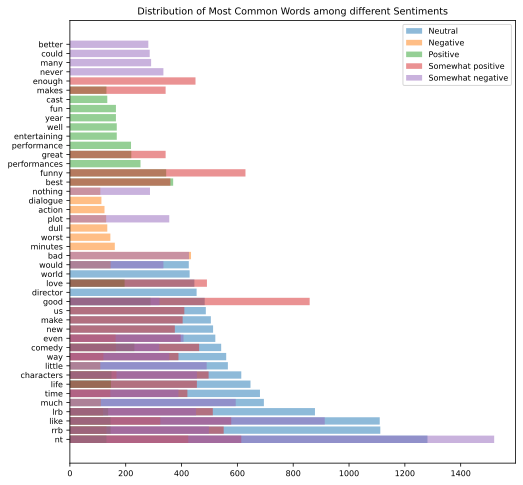

In [87]:
plt.figure(figsize=(8,8))
Plot_wordFrec(Neutral_Freq)
Plot_wordFrec(Negative_Freq)
Plot_wordFrec(Positive_Freq)
Plot_wordFrec(Somewhat_positive_Freq)
Plot_wordFrec(Somewhat_engative_Freq)
plt.legend(['Neutral','Negative','Positive','Somewhat positive','Somewhat negative'])
plt.title('Distribution of Most Common Words among different Sentiments')
plt.show()


随后我们利用nltk进行了一个初步的词频分析.